# Today's Roadmap (2.5 hours)

```bash
Part 1: Build Neural Network from Scratch (90 min)
├─ Forward pass (predictions)
├─ Loss calculation  
├─ Backward pass (gradients) ← The "magic"
└─ Training loop

Part 2: Rebuild with Keras (30 min)
└─ See what all that code simplifies to

Part 3: Train on MNIST (30 min)
└─ Complete pipeline + results
```

## 🎓 What You're Building:

```bash
Input Image (28x28 pixels)
    ↓ Flatten
Vector (784 numbers)
    ↓ W1 @ x + b1
Hidden Layer (128 neurons)
    ↓ ReLU (non-linearity)
Hidden Layer activated
    ↓ W2 @ h + b2
Output Layer (10 scores)
    ↓ Softmax
Probabilities [ 0.1, 0.05, ..., 0.8, ... ] → Digit 7!
```

In [519]:
"""
CHALLENGE: Build a Neural Network from Scratch
Your mission: Fill in the TODOs to complete the network

Architecture:
Input (784) → Dense(128) → ReLU → Dense(10) → Softmax

This is a 2-layer network for MNIST digit classification.
"""

'\nCHALLENGE: Build a Neural Network from Scratch\nYour mission: Fill in the TODOs to complete the network\n\nArchitecture:\nInput (784) → Dense(128) → ReLU → Dense(10) → Softmax\n\nThis is a 2-layer network for MNIST digit classification.\n'

In [520]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [521]:
# Set seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

In [522]:
print("🚀 Neural Network from Scratch - Challenge Mode")
print("="*60)

🚀 Neural Network from Scratch - Challenge Mode


In [523]:
# ============================================
# PART 1: LOAD & PREPARE DATA
# ============================================

In [524]:
print("\n📊 Loading MNIST dataset...")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


📊 Loading MNIST dataset...


In [525]:
print(f"Training data shape: {x_train.shape}")  # (60000, 28, 28)
print(f"Training labels shape: {y_train.shape}")  # (60000,)
print(f"Label example: {y_train[0]}")  # e.g., 5

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Label example: 5


✅ Saved sample images to 'mnist_samples.png'


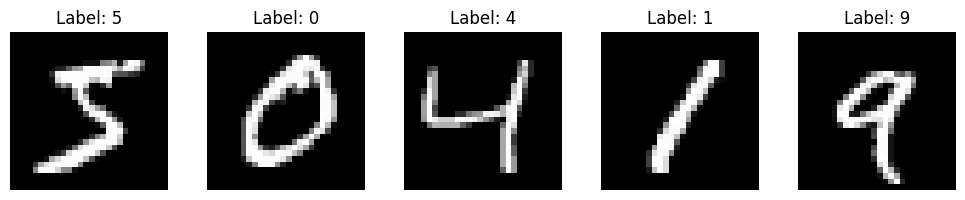

In [526]:
# Visualize a sample
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.savefig('mnist_samples.png', dpi=150, bbox_inches='tight')
print("✅ Saved sample images to 'mnist_samples.png'")

In [527]:
# ============================================
# TODO 1: PREPROCESS THE DATA
# ============================================

In [528]:
print("\n" + "="*60)
print("TODO 1: Preprocess the data")
print("="*60)


TODO 1: Preprocess the data


In [529]:
"""
Your tasks:
1. Flatten images from (28, 28) to (784,) - each image becomes a vector
2. Normalize pixel values from [0, 255] to [0, 1]
3. Convert labels to one-hot encoding
   Example: label 3 → [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

Hints:
- Use tf.reshape() for flattening
- Division for normalization
- tf.one_hot() for labels (depth=10 for 10 classes)
"""

'\nYour tasks:\n1. Flatten images from (28, 28) to (784,) - each image becomes a vector\n2. Normalize pixel values from [0, 255] to [0, 1]\n3. Convert labels to one-hot encoding\n   Example: label 3 → [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]\n\nHints:\n- Use tf.reshape() for flattening\n- Division for normalization\n- tf.one_hot() for labels (depth=10 for 10 classes)\n'

In [530]:
# Reshape the image shape into vectors
x_train = tf.reshape(x_train, shape=(60000, 784,))
x_test = tf.reshape(x_test, shape=(10000, 784,))

print(f" Reshaped training data: {x_train.shape}")  # (60000, 28, 28)
print(f"Reshaped testing data: {x_test.shape}")

 Reshaped training data: (60000, 784)
Reshaped testing data: (10000, 784)


In [531]:
print(x_train[0])

tf.Tensor(
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0

In [532]:
"""
The input pixel has values in the range [0, 255]
We need to normalize it in the range [0, 1]
"""

'\nThe input pixel has values in the range [0, 255]\nWe need to normalize it in the range [0, 1]\n'

In [533]:
# Normalize pixel values
# Divide every value of the pixel with 255
# 0/255 = 0
# 255/255 = 1

x_train = x_train / 255
x_test = x_test / 255

In [534]:
np.unique(x_train[0])

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.03529412,
       0.04313726, 0.05490196, 0.0627451 , 0.07058824, 0.09019608,
       0.09411765, 0.09803922, 0.10196079, 0.10588235, 0.11764706,
       0.13725491, 0.14117648, 0.15294118, 0.16862746, 0.1764706 ,
       0.18039216, 0.19215687, 0.21568628, 0.21960784, 0.2509804 ,
       0.25882354, 0.27450982, 0.30588236, 0.3137255 , 0.31764707,
       0.32156864, 0.3529412 , 0.3647059 , 0.36862746, 0.41960785,
       0.42352942, 0.44705883, 0.46666667, 0.49411765, 0.49803922,
       0.50980395, 0.5176471 , 0.52156866, 0.5294118 , 0.53333336,
       0.54509807, 0.5803922 , 0.5882353 , 0.6039216 , 0.6117647 ,
       0.627451  , 0.6509804 , 0.6666667 , 0.67058825, 0.6745098 ,
       0.6862745 , 0.7137255 , 0.7176471 , 0.7294118 , 0.73333335,
       0.74509805, 0.7647059 , 0.7764706 , 0.7882353 , 0.8039216 ,
       0.8117647 , 0.83137256, 0.8352941 , 0.85882354, 0.8666667 ,
       0.88235295, 0.8862745 , 0.8980392 , 0.93333334, 0.94117

In [535]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [536]:
# One-hot encoding

y_train_onehot = tf.one_hot(y_train, depth=10)
y_test_onehot = tf.one_hot(y_test, depth=10)

print(f"✓ Sample original label: {y_train[0]}")
print(f"✓ Sample one-hot: {y_train_onehot[0]}")


✓ Sample original label: 5
✓ Sample one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [537]:
y_train_onehot[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)>

In [538]:
# Uncomment to check your work:
print(f"\n✓ x_train shape: {x_train.shape}")  # Should be (60000, 784)
print(f"✓ y_train shape: {y_train_onehot.shape}")      # Should be (60000, 10)
print(f"✓ Pixel range: [{tf.reduce_min(x_train)}, {tf.reduce_max(x_train)}]")
print(f"✓ Sample one-hot: {y_train_onehot[0]}")


✓ x_train shape: (60000, 784)
✓ y_train shape: (60000, 10)
✓ Pixel range: [0.0, 1.0]
✓ Sample one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [539]:
# ============================================
# TODO 2: INITIALIZE WEIGHTS AND BIASES
# ============================================

In [540]:
print("\n" + "="*60)
print("TODO 2: Initialize network parameters")
print("="*60)


TODO 2: Initialize network parameters


In [541]:
"""
Network architecture:
Layer 1: 784 → 128 (input to hidden)
Layer 2: 128 → 10  (hidden to output)

For each layer, we need:
- Weights matrix (W): shape (input_size, output_size)
- Bias vector (b): shape (output_size,)

Initialize weights with small random values (Xavier initialization):
- Use tf.random.normal() with stddev = sqrt(2.0 / input_size)
- Biases can be zeros

Why small random values? If all weights are the same, all neurons 
learn the same thing (symmetry problem!)
"""

'\nNetwork architecture:\nLayer 1: 784 → 128 (input to hidden)\nLayer 2: 128 → 10  (hidden to output)\n\nFor each layer, we need:\n- Weights matrix (W): shape (input_size, output_size)\n- Bias vector (b): shape (output_size,)\n\nInitialize weights with small random values (Xavier initialization):\n- Use tf.random.normal() with stddev = sqrt(2.0 / input_size)\n- Biases can be zeros\n\nWhy small random values? If all weights are the same, all neurons \nlearn the same thing (symmetry problem!)\n'

### `tf.variable()` vs Regular Tensors

#### The Question
Why use `tf.Variable()` when regular tensors seem to work with operations like `W1 = W1 * 5`?

#### The Answer

##### What's Actually Happening with Reassignment
```python
W1 = tf.random.normal(shape=(784, 128))  # W1 → Tensor A (memory address 0x123...)
W1 = W1 * 5                              # Creates NEW Tensor B
# W1 → Tensor B (memory address 0x456...)
```

**Key Point**: W1 = W1 * 5 is NOT modifying the tensor in-place. It's creating a NEW tensor and reassigning the Python variable name to point to it.

#### Why This Breaks Neural Network Training
During training, we need in-place updates that TensorFlow can track:

|Operation |Regular Tensor| tf.Variable|
|----------|--------------|------------|
|`W1 = W1 * 5`|✅ Creates new tensor|✅ Creates new tensorW1.|
|`assign_sub(x)`|❌ AttributeError|✅ Modifies in-placeW1.|
|`assign(x)`|❌ AttributeError|✅ Modifies in-place|
|Trackable by optimizers|❌ No✅| Yes| 
|Gradient tracking|❌ Lost on reassignment|✅ Maintained|

#### Correct Implementation
```py
# ❌ WRONG - Regular tensor
W1 = tf.random.normal(shape=(784, 128), stddev=tf.math.sqrt(2.0 / 784))
b1 = tf.zeros(shape=(128,))

# ✅ CORRECT - Trainable variable
W1 = tf.Variable(tf.random.normal(shape=(784, 128), stddev=tf.math.sqrt(2.0 / 784)))
b1 = tf.Variable(tf.zeros(shape=(128,)))
```

#### Rule of Thumb
- **Trainable parameters** (weights, biases) → tf.Variable
- **Intermediate computations** (activations, predictions) → Regular tensors
- **Updates during training** → Use .assign() or .assign_sub(), not reassignment

In [542]:
# TODO: Initialize Layer 1 weights and biases
# W1 shape: (784, 128)
# b1 shape: (128,)

W1 = tf.Variable(tf.random.normal(shape=(784, 128), stddev=tf.math.sqrt(2.0 / 784)))
b1 = tf.Variable(tf.zeros(shape=(128,)))

In [543]:
# TODO: Initialize Layer 2 weights and biases  
# W2 shape: (128, 10)
# b2 shape: (10,)

W2 = tf.Variable(tf.random.normal(shape=(128, 10), stddev=tf.math.sqrt(2.0 / 128)))
b2 = tf.Variable(tf.zeros(shape=(10,)))

In [544]:
# Uncomment to check:
print(f"\n✓ W1 shape: {W1.shape}")  # Should be (784, 128)
print(f"✓ b1 shape: {b1.shape}")    # Should be (128,)
print(f"✓ W2 shape: {W2.shape}")    # Should be (128, 10)
print(f"✓ b2 shape: {b2.shape}")    # Should be (10,)


✓ W1 shape: (784, 128)
✓ b1 shape: (128,)
✓ W2 shape: (128, 10)
✓ b2 shape: (10,)


In [545]:
# ============================================
# TODO 3: IMPLEMENT ACTIVATION FUNCTIONS
# ============================================

In [546]:
print("\n" + "="*60)
print("TODO 3: Implement activation functions")
print("="*60)


TODO 3: Implement activation functions


In [547]:
"""
ReLU (Rectified Linear Unit): max(0, x)
- Introduces non-linearity
- Without this, multiple layers = one linear layer!

Softmax: converts logits to probabilities
- Output sums to 1.0
- Each value between [0, 1]
"""

'\nReLU (Rectified Linear Unit): max(0, x)\n- Introduces non-linearity\n- Without this, multiple layers = one linear layer!\n\nSoftmax: converts logits to probabilities\n- Output sums to 1.0\n- Each value between [0, 1]\n'

### ReLU
The ReLU (Rectified Linear Unit) function is a popular activation function in deep learning that ***returns the input directly if it's positive and outputs zero for any negative input***. Its mathematical definition is `f(x) = max(0, x)`.

### Softmax
The softmax function is a mathematical function used in machine learning to convert a vector of raw scores (logits) into a probability distribution over multiple classes, where each output value is a probability between 0 and 1 and all probabilities sum to 1.

#### How it Works 
1. **Exponentiation**:
Each raw score (logit) in the input vector is passed through an exponential function, effectively converting all values to positive numbers.
2. **Normalization**:
The result of the exponentiation for each input is then divided by the sum of all the exponentiated values.

In [548]:
def relu(x):
    """
    TODO: Implement ReLU activation
    ReLU(x) = max(0, x) = x if x > 0, else 0
    
    Hint: Use tf.maximum()
    """
    return tf.maximum(0, x)

In [549]:
def softmax(x):
    """
    TODO: Implement softmax
    softmax(x_i) = exp(x_i) / sum(exp(x_j)) for all j
    
    Hint: Use tf.exp() and tf.reduce_sum()
    Be careful with numerical stability - subtract max before exp!
    """
    # exp_x = tf.exp(x)

    # return exp_x / tf.reduce_sum(exp_x)
    """
    The above implementation has stability problem
    exp(1000) = INIFINITY
    """

    # Numerically stable softmax implementation
    x_stable = x - tf.reduce_max(x, axis=-1, keepdims=True)
    exp_x = tf.exp(x_stable)


    return exp_x / tf.reduce_sum(exp_x, axis=-1, keepdims=True)

In [550]:
# Test your functions:
test_input = tf.constant([-2.0, 0.0, 2.0])
print(f"\nReLU test: {relu(test_input)}")  # Should be [0, 0, 2]

test_logits = tf.constant([[1.0, 2.0, 3.0]])
print(f"Softmax test: {softmax(test_logits)}")  # Should sum to 1.0


ReLU test: [0. 0. 2.]
Softmax test: [[0.09003057 0.24472848 0.66524094]]


In [551]:
# ============================================
# TODO 4: FORWARD PASS
# ============================================

In [552]:
print("\n" + "="*60)
print("TODO 4: Implement forward pass")
print("="*60)


TODO 4: Implement forward pass


In [553]:
"""
Forward pass: Input → Hidden → Output

Layer 1: z1 = X @ W1 + b1  (linear transformation)
         a1 = relu(z1)      (non-linear activation)

Layer 2: z2 = a1 @ W2 + b2 (linear transformation)
         a2 = softmax(z2)   (convert to probabilities)

@ is matrix multiplication (same as tf.matmul)
"""

'\nForward pass: Input → Hidden → Output\n\nLayer 1: z1 = X @ W1 + b1  (linear transformation)\n         a1 = relu(z1)      (non-linear activation)\n\nLayer 2: z2 = a1 @ W2 + b2 (linear transformation)\n         a2 = softmax(z2)   (convert to probabilities)\n\n@ is matrix multiplication (same as tf.matmul)\n'

In [554]:
def forward_pass(X, W1, b1, W2, b2):
    """
    TODO: Implement the forward pass
    
    Args:
        X: Input batch, shape (batch_size, 784)
        W1, b1: Layer 1 parameters
        W2, b2: Layer 2 parameters
    
    Returns:
        a2: Output probabilities, shape (batch_size, 10)
        cache: Dictionary with intermediate values (needed for backprop)
        Store: z1, a1, z2
    """
    # TODO: Implement forward pass
    z1 = tf.matmul(X, W1) + b1
    a1 = relu(z1)  # ReLU activation
    z2 = tf.matmul(a1, W2) + b2
    a2 = softmax(z2)  # Softmax activation
    
    cache = {'z1': z1, 'a1': a1, 'z2': z2, 'X': X}
    return a2, cache

In [555]:
# Test forward pass:
sample_batch = x_train[:32]  # 32 samples
predictions, _ = forward_pass(sample_batch, W1, b1, W2, b2)
print(f"\n✓ Predictions shape: {predictions.shape}")  # Should be (32, 10)
print(f"✓ Predictions sum: {tf.reduce_sum(predictions[0])}")  # Should be ~1.0


✓ Predictions shape: (32, 10)
✓ Predictions sum: 1.0


In [556]:
# ============================================
# TODO 5: LOSS FUNCTION
# ============================================

In [557]:
print("\n" + "="*60)
print("TODO 5: Implement loss function")
print("="*60)


TODO 5: Implement loss function


In [558]:
"""
Cross-Entropy Loss (the standard for classification):

For each sample:
  loss = -sum(y_true * log(y_pred))

Where:
- y_true is one-hot encoded (e.g., [0,0,0,1,0,0,0,0,0,0] for digit 3)
- y_pred is the softmax output (probabilities)

Intuition: We want high probability for the correct class.
If y_pred[correct_class] is close to 1, loss is low.
If y_pred[correct_class] is close to 0, loss is high.
"""

'\nCross-Entropy Loss (the standard for classification):\n\nFor each sample:\n  loss = -sum(y_true * log(y_pred))\n\nWhere:\n- y_true is one-hot encoded (e.g., [0,0,0,1,0,0,0,0,0,0] for digit 3)\n- y_pred is the softmax output (probabilities)\n\nIntuition: We want high probability for the correct class.\nIf y_pred[correct_class] is close to 1, loss is low.\nIf y_pred[correct_class] is close to 0, loss is high.\n'

In [559]:
def cross_entropy_loss(y_true, y_pred):
    """
    TODO: Implement cross-entropy loss
    
    Args:
        y_true: True labels (one-hot), shape (batch_size, 10)
        y_pred: Predicted probabilities, shape (batch_size, 10)
    
    Returns:
        loss: Scalar loss value (average over batch)
    
    Hint: Use tf.reduce_sum() and tf.reduce_mean()
    Add a small epsilon (1e-7) to log to avoid log(0)
    """
    # Add epsilon INSIDE the log for numerical stability
    epsilon = 1e-7
    
    loss_per_sample = -tf.reduce_sum(y_true * tf.math.log(y_pred + epsilon), axis=-1)
    avg_loss = tf.reduce_mean(loss_per_sample)
    return avg_loss

In [560]:
# Test loss:
sample_labels = y_train_onehot[:32]
loss = cross_entropy_loss(sample_labels, predictions)
print(f"\n✓ Initial loss: {loss}")  # Should be around 2.3 (random guess)


✓ Initial loss: 2.4387741088867188


In [561]:
# ============================================
# TODO 6: BACKWARD PASS (Backpropagation)
# ============================================

In [562]:
print("\n" + "="*60)
print("TODO 6: Implement backward pass")
print("="*60)


TODO 6: Implement backward pass


In [563]:
"""
This is where the magic happens! We compute gradients using chain rule.

For softmax + cross-entropy, the gradient simplifies to:
  dL/dz2 = y_pred - y_true  (beautiful simplification!)

Then we propagate back:
  dL/dW2 = a1^T @ dz2
  dL/db2 = sum(dz2) across batch
  
  dL/da1 = dz2 @ W2^T
  dL/dz1 = dL/da1 * relu_derivative(z1)
  
  dL/dW1 = X^T @ dz1
  dL/db1 = sum(dz1) across batch

Don't worry if this looks scary - focus on implementing it!
"""

"\nThis is where the magic happens! We compute gradients using chain rule.\n\nFor softmax + cross-entropy, the gradient simplifies to:\n  dL/dz2 = y_pred - y_true  (beautiful simplification!)\n\nThen we propagate back:\n  dL/dW2 = a1^T @ dz2\n  dL/db2 = sum(dz2) across batch\n\n  dL/da1 = dz2 @ W2^T\n  dL/dz1 = dL/da1 * relu_derivative(z1)\n\n  dL/dW1 = X^T @ dz1\n  dL/db1 = sum(dz1) across batch\n\nDon't worry if this looks scary - focus on implementing it!\n"

In [ ]:
def backward_pass(y_true, y_pred, cache, W2):
    """
    TODO: Implement backpropagation
    
    Args:
        y_true: True labels (one-hot), shape (batch_size, 10)
        y_pred: Predictions from forward pass, shape (batch_size, 10)
        cache: Dictionary with z1, a1, z2, X from forward pass
        W2: Layer 2 weights (needed for gradient computation)
    
    Returns:
        gradients: Dictionary with dW1, db1, dW2, db2
    """
    batch_size = tf.cast(tf.shape(y_true)[0], tf.float32)
    X = cache['X']
    z1 = cache['z1']
    a1 = cache['a1']
    
    # TODO: Compute gradient at output layer
    dz2 = y_pred - y_true  # y_pred - y_true (this is the derivative of softmax + cross-entropy!)
    
    # TODO: Compute gradients for W2 and b2
    dW2 = (1/batch_size) * tf.matmul(tf.transpose(a1), dz2)  # (1/batch_size) * a1^T @ dz2
    db2 = tf.reshape((1/batch_size) * tf.reduce_sum(dz2, axis=0, keepdims=True), shape=(10, ))   # (1/batch_size) * sum(dz2, axis=0)
    
    # TODO: Propagate gradient to hidden layer
    da1 = tf.matmul(dz2, tf.transpose(W2))  # dz2 @ W2^T
    
    # TODO: Apply ReLU derivative (derivative of max(0,x) is 1 if x>0, else 0)
    relu_derivative = tf.cast(z1 > 0, tf.float32)  # Given for you
    dz1 = da1 * relu_derivative  # da1 * relu_derivative
    
    # TODO: Compute gradients for W1 and b1
    dW1 = (1/batch_size) * tf.matmul(tf.transpose(X), dz1)  # (1/batch_size) * X^T @ dz1
    db1 = tf.reshape((1/batch_size) * tf.reduce_sum(dz1, axis=0, keepdims=True), shape=(128, ))  # (1/batch_size) * sum(dz1, axis=0)
    
    return {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}

In [565]:
# ============================================
# TODO 7: TRAINING LOOP
# ============================================

In [566]:
print("\n" + "="*60)
print("TODO 7: Implement training loop")
print("="*60)


TODO 7: Implement training loop


In [567]:
"""
Training loop:
1. Forward pass (get predictions)
2. Compute loss
3. Backward pass (get gradients)
4. Update weights: W = W - learning_rate * dW
5. Repeat!

We'll train in mini-batches for efficiency.
"""

"\nTraining loop:\n1. Forward pass (get predictions)\n2. Compute loss\n3. Backward pass (get gradients)\n4. Update weights: W = W - learning_rate * dW\n5. Repeat!\n\nWe'll train in mini-batches for efficiency.\n"

In [568]:
def train(X, y, W1, b1, W2, b2, epochs=5, batch_size=32, learning_rate=0.01):
    """
    TODO: Implement training loop
    
    Track loss and accuracy per epoch.
    """
    n_samples = X.shape[0]
    history = {'loss': [], 'accuracy': []}
    
    for epoch in range(epochs):
        epoch_loss = 0
        epoch_accuracy = 0
        n_batches = 0
        
        # TODO: Shuffle data at the start of each epoch
        # Hint: Use tf.random.shuffle() with the same indices for X and y
        indices = tf.range(n_samples)
        indices = tf.random.shuffle(indices)
        X_shuffled = tf.gather(X, indices)
        y_shuffled = tf.gather(y, indices)
        
        # TODO: Loop through mini-batches
        for i in range(0, n_samples, batch_size):
            # Get batch
            end_idx = min(i + batch_size, n_samples)
            X_batch = X_shuffled[i:end_idx]  
            y_batch = y_shuffled[i:end_idx]
            
            # TODO: Forward pass
            y_pred, cache = forward_pass(X_batch, W1, b1, W2, b2)
            
            # TODO: Compute loss
            loss = cross_entropy_loss(y_batch, y_pred)
            
            # TODO: Backward pass
            grads = backward_pass(y_batch, y_pred, cache, W2)
            
            # TODO: Update weights (gradient descent)
            # W = W - learning_rate * dW
            # Remember to use .assign_sub() for tf.Variable
            
            W1.assign_sub(learning_rate * grads['dW1'])
            b1.assign_sub(learning_rate * grads['db1'])
            W2.assign_sub(learning_rate * grads['dW2'])
            b2.assign_sub(learning_rate * grads['db2'])
            
            # Track metrics
            epoch_loss += loss
            predictions = tf.argmax(y_pred, axis=1)
            labels = tf.argmax(y_batch, axis=1)
            accuracy = tf.reduce_mean(tf.cast(predictions == labels, tf.float32))
            epoch_accuracy += accuracy
            n_batches += 1
        
        # Average metrics
        epoch_loss /= n_batches
        epoch_accuracy /= n_batches
        history['loss'].append(float(epoch_loss))
        history['accuracy'].append(float(epoch_accuracy))
        
        print(f"Epoch {epoch+1}/{epochs} - Loss: {epoch_loss:.4f} - Accuracy: {epoch_accuracy:.4f}")
    
    return history

In [569]:
# ============================================
# TODO 8: PUT IT ALL TOGETHER
# ============================================

In [570]:
print("\n" + "="*60)
print("🎯 FINAL CHALLENGE: Complete all TODOs above, then run training!")
print("="*60)


🎯 FINAL CHALLENGE: Complete all TODOs above, then run training!



🚀 Starting training...


Epoch 1/5 - Loss: 0.4652 - Accuracy: 0.8757
Epoch 2/5 - Loss: 0.2586 - Accuracy: 0.9265
Epoch 3/5 - Loss: 0.2101 - Accuracy: 0.9398
Epoch 4/5 - Loss: 0.1770 - Accuracy: 0.9496
Epoch 5/5 - Loss: 0.1527 - Accuracy: 0.9570
✅ Saved training history to 'training_history.png'


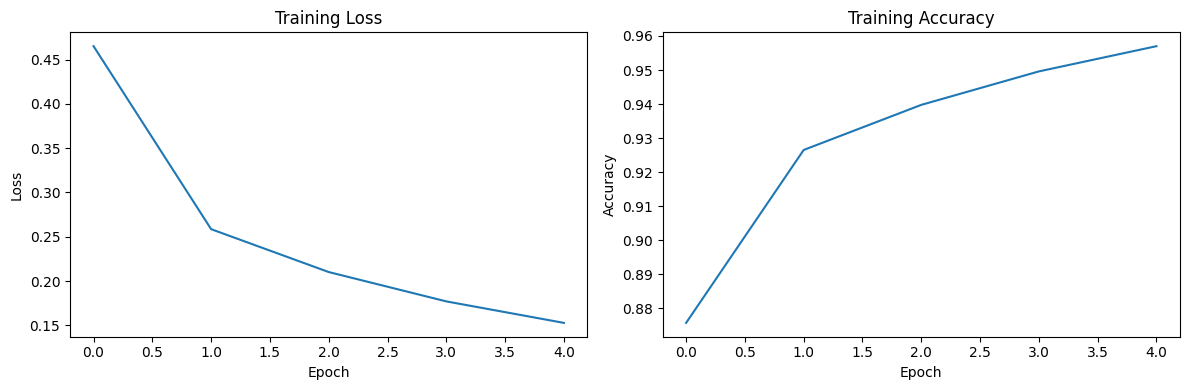

In [571]:
# Uncomment when you've completed all TODOs:
print("\n🚀 Starting training...")
history = train(x_train, y_train_onehot, W1, b1, W2, b2, 
                epochs=5, batch_size=128, learning_rate=0.1)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.savefig('training_history.png', dpi=150, bbox_inches='tight')
print("✅ Saved training history to 'training_history.png'")

In [572]:
# Test on test set
test_predictions, _ = forward_pass(x_test, W1, b1, W2, b2)
test_pred_labels = tf.argmax(test_predictions, axis=1)
test_true_labels = tf.argmax(y_test_onehot, axis=1)
test_accuracy = tf.reduce_mean(tf.cast(test_pred_labels == test_true_labels, tf.float32))
print(f"\n🎉 Test Accuracy: {test_accuracy:.4f}")


🎉 Test Accuracy: 0.9576


In [573]:
print("\n" + "="*60)
print("📝 DEBUGGING TIPS:")
print("="*60)
print("""
If you get stuck:
1. Check shapes! Use print(tensor.shape) everywhere
2. Test each function individually before combining
3. Start with a tiny batch (2-3 samples) to debug
4. Expected results:
   - Initial loss: ~2.3 (random guessing on 10 classes)
   - After training: loss < 0.3, accuracy > 90%

Common gotchas:
- Forgetting to flatten images
- Wrong matrix multiplication order (A @ B vs B @ A)
- Not using tf.Variable for trainable parameters
- Dividing by batch_size incorrectly
""")


📝 DEBUGGING TIPS:

If you get stuck:
1. Check shapes! Use print(tensor.shape) everywhere
2. Test each function individually before combining
3. Start with a tiny batch (2-3 samples) to debug
4. Expected results:
   - Initial loss: ~2.3 (random guessing on 10 classes)
   - After training: loss < 0.3, accuracy > 90%

Common gotchas:
- Forgetting to flatten images
- Wrong matrix multiplication order (A @ B vs B @ A)
- Not using tf.Variable for trainable parameters
- Dividing by batch_size incorrectly



## Conclusion

# Day 2 Reflection: Building Neural Networks from Scratch

## What I Built
- 2-layer fully connected network (784 → 128 → 10)
- Forward pass with ReLU and Softmax
- Cross-entropy loss function
- Backpropagation with chain rule
- Mini-batch gradient descent
- Achieved 95.76% test accuracy on MNIST

## Key Learnings

### Technical
1. **tf.Variable vs Tensor**: Variables are mutable and trackable, tensors are immutable
2. **Shape Management**: Always use axis=-1 and keepdims=True for broadcasting
3. **Numerical Stability**: Add epsilon before log, subtract max before exp
4. **Backprop Formula**: For softmax + cross-entropy, dL/dz = y_pred - y_true
5. **Weight Updates**: Use .assign_sub() for in-place updates

### Conceptual
1. Backpropagation = systematic application of chain rule
2. Neural networks = universal function approximators through composition
3. Non-linearities (ReLU) = essential for learning complex patterns
4. Batch processing = trade-off between speed and gradient accuracy

## Challenges Overcome
- TODO 6 (Backpropagation): Understanding gradient flow through layers
- TODO 7 (Training Loop): Orchestrating all components together
- Bug in loss function: Double negative sign (caught and fixed!)

## What Surprised Me
The network learned despite the loss display bug - because gradients were 
computed correctly! This shows that loss is just for monitoring; the real 
learning happens through backpropagation.

## What's Next
Tomorrow: See how Keras makes this 100x easier, then learn CNNs for better 
image understanding (moving from 96% to 99%+ accuracy).